# Creating Full Dataframe with all Counties

In [246]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import missingno as msno

In [247]:
os.chdir('C:\\Users\\rhian\\Downloads\\Capstone\\drugs\\Data\\Features')
os.getcwd()

'C:\\Users\\rhian\\Downloads\\Capstone\\drugs\\Data\\Features'

## Creating ALL counties base 

In [248]:
counties = pd.read_csv("County_FIPS.txt", sep='\t')
counties.columns = ['FIPS', 'County', 'State Code']
counties = pd.concat([counties]*10) 
counties = counties.reset_index(drop=True)
counties 

,FIPS,County,State Code
0,1001,Autauga,AL
1,1003,Baldwin,AL
2,1005,Barbour,AL
3,1007,Bibb,AL
4,1009,Blount,AL
...,...,...,...
32315,72151,Yabucoa,PR
32316,72153,Yauco,PR
32317,78010,St. Croix,VI
32318,78020,St. John,VI


In [249]:
year = pd.DataFrame(range(2011, 2021))
year.columns = ['Year']
year = pd.concat([year]*3232).sort_index()
year = year.reset_index()
year 

,index,Year
0,0,2011
1,0,2011
2,0,2011
3,0,2011
4,0,2011
...,...,...
32315,9,2020
32316,9,2020
32317,9,2020
32318,9,2020


In [250]:
counties.insert(0, "Year", year['Year'])
counties

,Year,FIPS,County,State Code
0,2011,1001,Autauga,AL
1,2011,1003,Baldwin,AL
2,2011,1005,Barbour,AL
3,2011,1007,Bibb,AL
4,2011,1009,Blount,AL
...,...,...,...,...
32315,2020,72151,Yabucoa,PR
32316,2020,72153,Yauco,PR
32317,2020,78010,St. Croix,VI
32318,2020,78020,St. John,VI


In [251]:
states = pd.read_csv("State_Names.txt", sep='\t')
states.head()

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


In [252]:
od_full = counties.merge(states, on = ['State Code'], how = 'left')

# drop all rows with NaN 
od_full = od_full.dropna()

od_full['County'] = od_full['County'] + ' County, ' + od_full['State Code']
od_full = od_full.drop(['State Code'], axis = 1)
od_full

,Year,FIPS,County,State,Region,Division
0,2011,1001,"Autauga County, AL",Alabama,South,East South Central
1,2011,1003,"Baldwin County, AL",Alabama,South,East South Central
2,2011,1005,"Barbour County, AL",Alabama,South,East South Central
3,2011,1007,"Bibb County, AL",Alabama,South,East South Central
4,2011,1009,"Blount County, AL",Alabama,South,East South Central
...,...,...,...,...,...,...
32225,2020,56037,"Sweetwater County, WY",Wyoming,West,Mountain
32226,2020,56039,"Teton County, WY",Wyoming,West,Mountain
32227,2020,56041,"Uinta County, WY",Wyoming,West,Mountain
32228,2020,56043,"Washakie County, WY",Wyoming,West,Mountain


## Add features now! 

In [253]:
os.chdir('C:\\Users\\rhian\\Downloads\\Capstone\\drugs\\Data\\od_deaths_Versions')
os.getcwd()

'C:\\Users\\rhian\\Downloads\\Capstone\\drugs\\Data\\od_deaths_Versions'

In [254]:
# Add overdose data 
od_deaths = pd.read_csv('od_deaths.csv')
od_deaths = od_deaths[['Year', 'County Code', 'Deaths', 'Population', 'Cruder Rate']]
od_deaths.columns = ['Year', 'FIPS', 'Overdose_Deaths', 'od_pop', 'Overdose_Rate_per_100k']
od_deaths

,Year,FIPS,Overdose_Deaths,od_pop,Overdose_Rate_per_100k
0,1999.0,1003.0,11.0,137555.0,7.996801
1,1999.0,1073.0,34.0,662845.0,5.129404
2,1999.0,1089.0,10.0,274693.0,3.640428
3,1999.0,1097.0,28.0,399323.0,7.011868
4,1999.0,2020.0,21.0,259348.0,8.097228
...,...,...,...,...,...
15891,2020.0,55139.0,38.0,171631.0,22.140522
15892,2020.0,55141.0,18.0,72560.0,24.807056
15893,2020.0,56021.0,17.0,100595.0,16.899448
15894,2020.0,56025.0,16.0,80815.0,19.798305


In [255]:
od_full = od_full.merge(od_deaths, on = ['Year', 'FIPS'], how = 'left')
od_full

,Year,FIPS,County,State,Region,Division,Overdose_Deaths,od_pop,Overdose_Rate_per_100k
0,2011,1001,"Autauga County, AL",Alabama,South,East South Central,NaN,NaN,NaN
1,2011,1003,"Baldwin County, AL",Alabama,South,East South Central,24.0,186717.0,12.853677
2,2011,1005,"Barbour County, AL",Alabama,South,East South Central,NaN,NaN,NaN
3,2011,1007,"Bibb County, AL",Alabama,South,East South Central,NaN,NaN,NaN
4,2011,1009,"Blount County, AL",Alabama,South,East South Central,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
31415,2020,56037,"Sweetwater County, WY",Wyoming,West,Mountain,15.0,42673.0,35.151032
31416,2020,56039,"Teton County, WY",Wyoming,West,Mountain,NaN,NaN,NaN
31417,2020,56041,"Uinta County, WY",Wyoming,West,Mountain,NaN,NaN,NaN
31418,2020,56043,"Washakie County, WY",Wyoming,West,Mountain,NaN,NaN,NaN


In [256]:
od_full.to_csv('ACTUALLY_od_counties_full_w2010.csv', index=False)

In [257]:
os.chdir('C:\\Users\\rhian\\Downloads\\Capstone\\drugs\\Data\\Features')
os.getcwd()

'C:\\Users\\rhian\\Downloads\\Capstone\\drugs\\Data\\Features'

In [258]:
# Add Population + County Health Ranking Data 
health_rank1 = pd.read_csv('countyhealth_sheet1.csv') 
health_rank1 = health_rank1.drop(['County', 'State'], axis=1)
health_rank1

,Year,FIPS,Premature Deaths,Potential Years Lost,% Low Weight Births,% Smokers,% Adults Obsese,% Excessive Drinking,Vehicle Crash Death Rate,Teen Birth Rate,% Uninsured,PrimCarePhys per 100k,HS Grad Rate,% College Edu,% Children in Poverty,% 1PHH,Violent Crime Rate
0,2011,1000.0,68872.0,10189.200000,10.210000,23.600000,31.9,12.600000,25.600000,53.200000,17.100000,105.00000,67.0,55.100000,22.1,36.200000,431.900000
1,2011,1001.0,675.0,9967.400000,9.450000,27.400000,31.5,14.100000,28.300000,52.000000,15.500000,67.50000,75.0,55.400000,14.9,29.700000,256.300000
2,2011,1003.0,2219.0,8321.800000,8.820000,21.900000,26.2,19.400000,23.200000,49.600000,20.900000,120.90000,70.0,61.500000,15.1,28.900000,194.700000
3,2011,1005.0,403.0,9559.000000,11.350000,22.900000,37.6,8.500000,29.200000,79.900000,16.300000,57.00000,55.0,34.700000,31.9,52.500000,72.200000
4,2011,1007.0,365.0,13282.900000,9.940000,33.000000,32.3,11.300000,42.500000,64.400000,19.900000,41.70000,60.0,40.300000,25.0,32.000000,164.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28951,2020,22119.0,813.0,11659.978824,12.366983,22.964288,32.9,16.163980,30.232558,45.842859,9.397261,60.94774,76.6,49.325127,34.5,41.302656,368.068157
28952,2020,22121.0,369.0,8586.917142,11.337780,20.022154,37.9,20.179057,42.857143,30.512378,7.481793,15.22939,74.3,56.566500,20.0,47.599232,350.682543
28953,2020,22123.0,200.0,10912.195935,10.706402,21.277979,46.8,18.670972,25.000000,44.929397,10.810491,27.31992,93.3,35.883621,34.0,35.057471,401.907959
28954,2020,22125.0,285.0,8675.348637,9.133489,21.898367,21.8,19.935303,28.571429,26.567040,6.866371,71.52146,90.9,45.881270,19.3,42.890902,260.620276


In [259]:
health_rank2 = pd.read_csv('countyhealth_sheet2.csv')
health_rank2 = health_rank2.drop(['County', 'State'], axis=1)
health_rank2

,Year,FIPS,Population,% Age<18,% Age>=65,% Black,% Native,% Asian,% Pacific Islander,% Hispanic,% not prof in English,% Female,% Rural,% Diabetes,HIV Rate,% Majority Income to Housing,% Child Free Lunch
0,2011,1000.0,4708708.0,23.900000,13.800000,26.100000,0.500000,1.100000,0.000000,3.100000,2.000000,51.600000,44.600000,11.9,NaN,29.500000,51.200000
1,2011,1001.0,50756.0,27.800000,11.600000,18.400000,0.500000,0.600000,0.000000,2.200000,0.800000,51.400000,44.800000,11.4,169.9,25.200000,28.800000
2,2011,1003.0,179878.0,23.100000,17.000000,10.000000,0.500000,0.600000,0.000000,3.300000,1.800000,51.000000,54.200000,9.8,176.1,29.400000,28.900000
3,2011,1005.0,29737.0,22.300000,13.800000,46.600000,0.500000,0.300000,0.000000,5.000000,2.300000,46.800000,71.500000,13.6,331.2,36.300000,65.100000
4,2011,1007.0,21587.0,23.300000,13.500000,22.300000,0.300000,0.100000,0.000000,1.500000,0.900000,48.000000,81.500000,11.1,89.5,17.600000,47.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28951,2020,22119.0,38798.0,22.630032,19.758750,34.009485,0.556730,0.435589,0.025775,1.992371,0.107709,51.386669,53.041959,14.4,219.5,15.188418,43.624377
28952,2020,22121.0,26427.0,24.448481,13.648920,39.376395,0.238393,0.715178,0.056760,3.216407,0.328141,50.630037,30.460737,9.1,507.2,11.092697,67.413704
28953,2020,22123.0,10982.0,23.065015,19.031142,15.616463,0.855946,0.318703,0.027317,3.961027,0.122676,49.116736,100.000000,24.8,150.3,6.351931,91.858754
28954,2020,22125.0,15460.0,16.170763,15.025873,44.275550,0.174644,0.265201,0.038810,1.558862,0.487970,34.631307,100.000000,8.4,1088.4,11.092623,49.682107


In [260]:
od_full = od_full.merge(health_rank2, on = ['Year', 'FIPS'], how = 'left')
od_full

,Year,FIPS,County,State,Region,Division,Overdose_Deaths,od_pop,Overdose_Rate_per_100k,Population,% Age<18,% Age>=65,% Black,% Native,% Asian,% Pacific Islander,% Hispanic,% not prof in English,% Female,% Rural,% Diabetes,HIV Rate,% Majority Income to Housing,% Child Free Lunch
0,2011,1001,"Autauga County, AL",Alabama,South,East South Central,NaN,NaN,NaN,50756.0,27.800000,11.600000,18.400000,0.500000,0.600000,0.000000,2.200000,0.800000,51.400000,44.800000,11.4,169.9,25.200000,28.800000
1,2011,1003,"Baldwin County, AL",Alabama,South,East South Central,24.0,186717.0,12.853677,179878.0,23.100000,17.000000,10.000000,0.500000,0.600000,0.000000,3.300000,1.800000,51.000000,54.200000,9.8,176.1,29.400000,28.900000
2,2011,1005,"Barbour County, AL",Alabama,South,East South Central,NaN,NaN,NaN,29737.0,22.300000,13.800000,46.600000,0.500000,0.300000,0.000000,5.000000,2.300000,46.800000,71.500000,13.6,331.2,36.300000,65.100000
3,2011,1007,"Bibb County, AL",Alabama,South,East South Central,NaN,NaN,NaN,21587.0,23.300000,13.500000,22.300000,0.300000,0.100000,0.000000,1.500000,0.900000,48.000000,81.500000,11.1,89.5,17.600000,47.800000
4,2011,1009,"Blount County, AL",Alabama,South,East South Central,NaN,NaN,NaN,58345.0,24.200000,14.700000,2.100000,0.500000,0.200000,0.000000,7.900000,4.100000,50.200000,91.000000,11.4,66.2,21.200000,36.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31415,2020,56037,"Sweetwater County, WY",Wyoming,West,Mountain,15.0,42673.0,35.151032,43051.0,26.224710,12.111217,1.145153,1.544680,1.010429,0.157952,16.083250,1.633221,48.544749,10.916313,8.8,73.1,8.385595,39.333579
31416,2020,56039,"Teton County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,23081.0,18.365755,15.415277,0.632555,0.914172,1.412417,0.151640,14.878038,4.314477,48.403449,46.430920,2.2,65.4,10.769059,22.206991
31417,2020,56041,"Uinta County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,20299.0,28.789596,14.079511,0.684763,1.418789,0.472930,0.147791,9.236908,0.696080,49.332479,43.095937,11.3,30.8,7.707668,37.784558
31418,2020,56043,"Washakie County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,7885.0,22.739379,21.686747,0.469245,1.813570,0.824350,0.101458,14.051997,0.324886,49.422955,35.954529,11.7,0.0,6.816780,37.508651


In [261]:
od_full = od_full.merge(health_rank1, on = ['Year', 'FIPS'], how = 'left')
od_full

,Year,FIPS,County,State,Region,Division,Overdose_Deaths,od_pop,Overdose_Rate_per_100k,Population,% Age<18,% Age>=65,% Black,% Native,% Asian,% Pacific Islander,% Hispanic,% not prof in English,% Female,% Rural,% Diabetes,HIV Rate,% Majority Income to Housing,% Child Free Lunch,Premature Deaths,Potential Years Lost,% Low Weight Births,% Smokers,% Adults Obsese,% Excessive Drinking,Vehicle Crash Death Rate,Teen Birth Rate,% Uninsured,PrimCarePhys per 100k,HS Grad Rate,% College Edu,% Children in Poverty,% 1PHH,Violent Crime Rate
0,2011,1001,"Autauga County, AL",Alabama,South,East South Central,NaN,NaN,NaN,50756.0,27.800000,11.600000,18.400000,0.500000,0.600000,0.000000,2.200000,0.800000,51.400000,44.800000,11.4,169.9,25.200000,28.800000,675.0,9967.400000,9.450000,27.400000,31.5,14.100000,28.300000,52.000000,15.500000,67.50000,75.000000,55.400000,14.9,29.700000,256.300000
1,2011,1003,"Baldwin County, AL",Alabama,South,East South Central,24.0,186717.0,12.853677,179878.0,23.100000,17.000000,10.000000,0.500000,0.600000,0.000000,3.300000,1.800000,51.000000,54.200000,9.8,176.1,29.400000,28.900000,2219.0,8321.800000,8.820000,21.900000,26.2,19.400000,23.200000,49.600000,20.900000,120.90000,70.000000,61.500000,15.1,28.900000,194.700000
2,2011,1005,"Barbour County, AL",Alabama,South,East South Central,NaN,NaN,NaN,29737.0,22.300000,13.800000,46.600000,0.500000,0.300000,0.000000,5.000000,2.300000,46.800000,71.500000,13.6,331.2,36.300000,65.100000,403.0,9559.000000,11.350000,22.900000,37.6,8.500000,29.200000,79.900000,16.300000,57.00000,55.000000,34.700000,31.9,52.500000,72.200000
3,2011,1007,"Bibb County, AL",Alabama,South,East South Central,NaN,NaN,NaN,21587.0,23.300000,13.500000,22.300000,0.300000,0.100000,0.000000,1.500000,0.900000,48.000000,81.500000,11.1,89.5,17.600000,47.800000,365.0,13282.900000,9.940000,33.000000,32.3,11.300000,42.500000,64.400000,19.900000,41.70000,60.000000,40.300000,25.0,32.000000,164.400000
4,2011,1009,"Blount County, AL",Alabama,South,East South Central,NaN,NaN,NaN,58345.0,24.200000,14.700000,2.100000,0.500000,0.200000,0.000000,7.900000,4.100000,50.200000,91.000000,11.4,66.2,21.200000,36.800000,756.0,8475.000000,7.320000,22.300000,31.9,4.900000,30.000000,55.500000,21.100000,36.30000,70.000000,42.300000,17.3,24.100000,45.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31415,2020,56037,"Sweetwater County, WY",Wyoming,West,Mountain,15.0,42673.0,35.151032,43051.0,26.224710,12.111217,1.145153,1.544680,1.010429,0.157952,16.083250,1.633221,48.544749,10.916313,8.8,73.1,8.385595,39.333579,532.0,7831.827655,9.705248,18.073422,29.8,22.871908,33.962264,31.293325,14.464995,36.75288,80.500000,58.888094,10.0,25.320214,300.494146
31416,2020,56039,"Teton County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,23081.0,18.365755,15.415277,0.632555,0.914172,1.412417,0.151640,14.878038,4.314477,48.403449,46.430920,2.2,65.4,10.769059,22.206991,109.0,2730.603992,7.736721,14.546369,12.4,25.533577,22.222222,10.462075,16.034517,116.05416,87.765957,81.397391,6.7,27.904870,NaN
31417,2020,56041,"Uinta County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,20299.0,28.789596,14.079511,0.684763,1.418789,0.472930,0.147791,9.236908,0.696080,49.332479,43.095937,11.3,30.8,7.707668,37.784558,256.0,7330.683549,10.110206,17.212675,35.8,19.113357,20.000000,30.632411,13.664737,43.91315,84.687500,57.531056,12.1,17.447307,71.006517
31418,2020,56043,"Washakie County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,7885.0,22.739379,21.686747,0.469245,1.813570,0.824350,0.101458,14.051997,0.324886,49.422955,35.954529,11.7,0.0,6.816780,37.508651,110.0,6586.049959,7.028754,16.859400,28.8,16.523261,20.000000,25.229358,16.730280,49.60317,84.536082,59.083192,16.1,25.026455,78.266105


In [262]:
# Adding opioid dispense rates 
opioid = pd.read_csv('opioid_dispense.csv')
opioid = opioid.drop(['Unnamed: 0', 'County', 'State'], axis=1)
opioid

,Year,FIPS,dispenserate100
0,2006,2013,NaN
1,2006,2016,NaN
2,2006,2020,71.5
3,2006,2050,NaN
4,2006,2060,NaN
...,...,...,...
46580,2020,56037,70.0
46581,2020,56039,50.6
46582,2020,56041,60.0
46583,2020,56043,40.2


In [263]:
od_full = od_full.merge(opioid, on = ['Year', 'FIPS'], how = 'left')
od_full

,Year,FIPS,County,State,Region,Division,Overdose_Deaths,od_pop,Overdose_Rate_per_100k,Population,% Age<18,% Age>=65,% Black,% Native,% Asian,% Pacific Islander,% Hispanic,% not prof in English,% Female,% Rural,% Diabetes,HIV Rate,% Majority Income to Housing,% Child Free Lunch,Premature Deaths,Potential Years Lost,% Low Weight Births,% Smokers,% Adults Obsese,% Excessive Drinking,Vehicle Crash Death Rate,Teen Birth Rate,% Uninsured,PrimCarePhys per 100k,HS Grad Rate,% College Edu,% Children in Poverty,% 1PHH,Violent Crime Rate,dispenserate100
0,2011,1001,"Autauga County, AL",Alabama,South,East South Central,NaN,NaN,NaN,50756.0,27.800000,11.600000,18.400000,0.500000,0.600000,0.000000,2.200000,0.800000,51.400000,44.800000,11.4,169.9,25.200000,28.800000,675.0,9967.400000,9.450000,27.400000,31.5,14.100000,28.300000,52.000000,15.500000,67.50000,75.000000,55.400000,14.9,29.700000,256.300000,144.1
1,2011,1003,"Baldwin County, AL",Alabama,South,East South Central,24.0,186717.0,12.853677,179878.0,23.100000,17.000000,10.000000,0.500000,0.600000,0.000000,3.300000,1.800000,51.000000,54.200000,9.8,176.1,29.400000,28.900000,2219.0,8321.800000,8.820000,21.900000,26.2,19.400000,23.200000,49.600000,20.900000,120.90000,70.000000,61.500000,15.1,28.900000,194.700000,150.0
2,2011,1005,"Barbour County, AL",Alabama,South,East South Central,NaN,NaN,NaN,29737.0,22.300000,13.800000,46.600000,0.500000,0.300000,0.000000,5.000000,2.300000,46.800000,71.500000,13.6,331.2,36.300000,65.100000,403.0,9559.000000,11.350000,22.900000,37.6,8.500000,29.200000,79.900000,16.300000,57.00000,55.000000,34.700000,31.9,52.500000,72.200000,99.4
3,2011,1007,"Bibb County, AL",Alabama,South,East South Central,NaN,NaN,NaN,21587.0,23.300000,13.500000,22.300000,0.300000,0.100000,0.000000,1.500000,0.900000,48.000000,81.500000,11.1,89.5,17.600000,47.800000,365.0,13282.900000,9.940000,33.000000,32.3,11.300000,42.500000,64.400000,19.900000,41.70000,60.000000,40.300000,25.0,32.000000,164.400000,57.7
4,2011,1009,"Blount County, AL",Alabama,South,East South Central,NaN,NaN,NaN,58345.0,24.200000,14.700000,2.100000,0.500000,0.200000,0.000000,7.900000,4.100000,50.200000,91.000000,11.4,66.2,21.200000,36.800000,756.0,8475.000000,7.320000,22.300000,31.9,4.900000,30.000000,55.500000,21.100000,36.30000,70.000000,42.300000,17.3,24.100000,45.800000,64.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31415,2020,56037,"Sweetwater County, WY",Wyoming,West,Mountain,15.0,42673.0,35.151032,43051.0,26.224710,12.111217,1.145153,1.544680,1.010429,0.157952,16.083250,1.633221,48.544749,10.916313,8.8,73.1,8.385595,39.333579,532.0,7831.827655,9.705248,18.073422,29.8,22.871908,33.962264,31.293325,14.464995,36.75288,80.500000,58.888094,10.0,25.320214,300.494146,70.0
31416,2020,56039,"Teton County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,23081.0,18.365755,15.415277,0.632555,0.914172,1.412417,0.151640,14.878038,4.314477,48.403449,46.430920,2.2,65.4,10.769059,22.206991,109.0,2730.603992,7.736721,14.546369,12.4,25.533577,22.222222,10.462075,16.034517,116.05416,87.765957,81.397391,6.7,27.904870,NaN,50.6
31417,2020,56041,"Uinta County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,20299.0,28.789596,14.079511,0.684763,1.418789,0.472930,0.147791,9.236908,0.696080,49.332479,43.095937,11.3,30.8,7.707668,37.784558,256.0,7330.683549,10.110206,17.212675,35.8,19.113357,20.000000,30.632411,13.664737,43.91315,84.687500,57.531056,12.1,17.447307,71.006517,60.0
31418,2020,56043,"Washakie County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,7885.0,22.739379,21.686747,0.469245,1.813570,0.824350,0.101458,14.051997,0.324886,49.422955,35.954529,11.7,0.0,6.816780,37.508651,110.0,6586.049959,7.028754,16.859400,28.8,16.523261,20.000000,25.229358,16.730280,49.60317,84.536082,59.083192,16.1,25.026455,78.266105,40.2


In [264]:
# Adding unemployment rates 
unemployment = pd.read_csv('unemployment_clean.csv')
unemployment = unemployment.drop(['County', 'State'], axis=1)
unemployment

,FIPS,Year,Unemployment_rate
0,1000,2000,4.6
1,1001,2000,4.1
2,1003,2000,3.7
3,1005,2000,5.6
4,1007,2000,5.4
...,...,...,...
68749,72145,2020,NaN
68750,72147,2020,NaN
68751,72149,2020,NaN
68752,72151,2020,NaN


In [265]:
od_full = od_full.merge(unemployment, on = ['Year', 'FIPS'], how = 'left')
od_full

,Year,FIPS,County,State,Region,Division,Overdose_Deaths,od_pop,Overdose_Rate_per_100k,Population,% Age<18,% Age>=65,% Black,% Native,% Asian,% Pacific Islander,% Hispanic,% not prof in English,% Female,% Rural,% Diabetes,HIV Rate,% Majority Income to Housing,% Child Free Lunch,Premature Deaths,Potential Years Lost,% Low Weight Births,% Smokers,% Adults Obsese,% Excessive Drinking,Vehicle Crash Death Rate,Teen Birth Rate,% Uninsured,PrimCarePhys per 100k,HS Grad Rate,% College Edu,% Children in Poverty,% 1PHH,Violent Crime Rate,dispenserate100,Unemployment_rate
0,2011,1001,"Autauga County, AL",Alabama,South,East South Central,NaN,NaN,NaN,50756.0,27.800000,11.600000,18.400000,0.500000,0.600000,0.000000,2.200000,0.800000,51.400000,44.800000,11.4,169.9,25.200000,28.800000,675.0,9967.400000,9.450000,27.400000,31.5,14.100000,28.300000,52.000000,15.500000,67.50000,75.000000,55.400000,14.9,29.700000,256.300000,144.1,8.3
1,2011,1003,"Baldwin County, AL",Alabama,South,East South Central,24.0,186717.0,12.853677,179878.0,23.100000,17.000000,10.000000,0.500000,0.600000,0.000000,3.300000,1.800000,51.000000,54.200000,9.8,176.1,29.400000,28.900000,2219.0,8321.800000,8.820000,21.900000,26.2,19.400000,23.200000,49.600000,20.900000,120.90000,70.000000,61.500000,15.1,28.900000,194.700000,150.0,9.0
2,2011,1005,"Barbour County, AL",Alabama,South,East South Central,NaN,NaN,NaN,29737.0,22.300000,13.800000,46.600000,0.500000,0.300000,0.000000,5.000000,2.300000,46.800000,71.500000,13.6,331.2,36.300000,65.100000,403.0,9559.000000,11.350000,22.900000,37.6,8.500000,29.200000,79.900000,16.300000,57.00000,55.000000,34.700000,31.9,52.500000,72.200000,99.4,11.4
3,2011,1007,"Bibb County, AL",Alabama,South,East South Central,NaN,NaN,NaN,21587.0,23.300000,13.500000,22.300000,0.300000,0.100000,0.000000,1.500000,0.900000,48.000000,81.500000,11.1,89.5,17.600000,47.800000,365.0,13282.900000,9.940000,33.000000,32.3,11.300000,42.500000,64.400000,19.900000,41.70000,60.000000,40.300000,25.0,32.000000,164.400000,57.7,10.4
4,2011,1009,"Blount County, AL",Alabama,South,East South Central,NaN,NaN,NaN,58345.0,24.200000,14.700000,2.100000,0.500000,0.200000,0.000000,7.900000,4.100000,50.200000,91.000000,11.4,66.2,21.200000,36.800000,756.0,8475.000000,7.320000,22.300000,31.9,4.900000,30.000000,55.500000,21.100000,36.30000,70.000000,42.300000,17.3,24.100000,45.800000,64.8,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31415,2020,56037,"Sweetwater County, WY",Wyoming,West,Mountain,15.0,42673.0,35.151032,43051.0,26.224710,12.111217,1.145153,1.544680,1.010429,0.157952,16.083250,1.633221,48.544749,10.916313,8.8,73.1,8.385595,39.333579,532.0,7831.827655,9.705248,18.073422,29.8,22.871908,33.962264,31.293325,14.464995,36.75288,80.500000,58.888094,10.0,25.320214,300.494146,70.0,7.4
31416,2020,56039,"Teton County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,23081.0,18.365755,15.415277,0.632555,0.914172,1.412417,0.151640,14.878038,4.314477,48.403449,46.430920,2.2,65.4,10.769059,22.206991,109.0,2730.603992,7.736721,14.546369,12.4,25.533577,22.222222,10.462075,16.034517,116.05416,87.765957,81.397391,6.7,27.904870,NaN,50.6,6.0
31417,2020,56041,"Uinta County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,20299.0,28.789596,14.079511,0.684763,1.418789,0.472930,0.147791,9.236908,0.696080,49.332479,43.095937,11.3,30.8,7.707668,37.784558,256.0,7330.683549,10.110206,17.212675,35.8,19.113357,20.000000,30.632411,13.664737,43.91315,84.687500,57.531056,12.1,17.447307,71.006517,60.0,6.3
31418,2020,56043,"Washakie County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,7885.0,22.739379,21.686747,0.469245,1.813570,0.824350,0.101458,14.051997,0.324886,49.422955,35.954529,11.7,0.0,6.816780,37.508651,110.0,6586.049959,7.028754,16.859400,28.8,16.523261,20.000000,25.229358,16.730280,49.60317,84.536082,59.083192,16.1,25.026455,78.266105,40.2,5.3


In [266]:
# Adding poverty rates 
poverty = pd.read_csv('saipe_99_20.csv')
poverty = poverty[['Year', 'FIPS', 'PovertyPercentage', 'MedianHHI']]
poverty 

,Year,FIPS,PovertyPercentage,MedianHHI
0,1999,0,11.9,40696
1,1999,1000,15.3,33840
2,1999,1001,11.4,39702
3,1999,1003,10.5,39194
4,1999,1005,22.3,25837
...,...,...,...,...
70259,2020,56037,7.6,70583
70260,2020,56039,5.2,92488
70261,2020,56041,8.5,71246
70262,2020,56043,9.7,58532


In [267]:
od_full = od_full.merge(poverty, on = ['Year', 'FIPS'], how = 'left')
od_full

,Year,FIPS,County,State,Region,Division,Overdose_Deaths,od_pop,Overdose_Rate_per_100k,Population,% Age<18,% Age>=65,% Black,% Native,% Asian,% Pacific Islander,% Hispanic,% not prof in English,% Female,% Rural,% Diabetes,HIV Rate,% Majority Income to Housing,% Child Free Lunch,Premature Deaths,Potential Years Lost,% Low Weight Births,% Smokers,% Adults Obsese,% Excessive Drinking,Vehicle Crash Death Rate,Teen Birth Rate,% Uninsured,PrimCarePhys per 100k,HS Grad Rate,% College Edu,% Children in Poverty,% 1PHH,Violent Crime Rate,dispenserate100,Unemployment_rate,PovertyPercentage,MedianHHI
0,2011,1001,"Autauga County, AL",Alabama,South,East South Central,NaN,NaN,NaN,50756.0,27.800000,11.600000,18.400000,0.500000,0.600000,0.000000,2.200000,0.800000,51.400000,44.800000,11.4,169.9,25.200000,28.800000,675.0,9967.400000,9.450000,27.400000,31.5,14.100000,28.300000,52.000000,15.500000,67.50000,75.000000,55.400000,14.9,29.700000,256.300000,144.1,8.3,14.9,48863
1,2011,1003,"Baldwin County, AL",Alabama,South,East South Central,24.0,186717.0,12.853677,179878.0,23.100000,17.000000,10.000000,0.500000,0.600000,0.000000,3.300000,1.800000,51.000000,54.200000,9.8,176.1,29.400000,28.900000,2219.0,8321.800000,8.820000,21.900000,26.2,19.400000,23.200000,49.600000,20.900000,120.90000,70.000000,61.500000,15.1,28.900000,194.700000,150.0,9.0,13.4,50144
2,2011,1005,"Barbour County, AL",Alabama,South,East South Central,NaN,NaN,NaN,29737.0,22.300000,13.800000,46.600000,0.500000,0.300000,0.000000,5.000000,2.300000,46.800000,71.500000,13.6,331.2,36.300000,65.100000,403.0,9559.000000,11.350000,22.900000,37.6,8.500000,29.200000,79.900000,16.300000,57.00000,55.000000,34.700000,31.9,52.500000,72.200000,99.4,11.4,29.5,30117
3,2011,1007,"Bibb County, AL",Alabama,South,East South Central,NaN,NaN,NaN,21587.0,23.300000,13.500000,22.300000,0.300000,0.100000,0.000000,1.500000,0.900000,48.000000,81.500000,11.1,89.5,17.600000,47.800000,365.0,13282.900000,9.940000,33.000000,32.3,11.300000,42.500000,64.400000,19.900000,41.70000,60.000000,40.300000,25.0,32.000000,164.400000,57.7,10.4,22.2,37347
4,2011,1009,"Blount County, AL",Alabama,South,East South Central,NaN,NaN,NaN,58345.0,24.200000,14.700000,2.100000,0.500000,0.200000,0.000000,7.900000,4.100000,50.200000,91.000000,11.4,66.2,21.200000,36.800000,756.0,8475.000000,7.320000,22.300000,31.9,4.900000,30.000000,55.500000,21.100000,36.30000,70.000000,42.300000,17.3,24.100000,45.800000,64.8,8.6,14.9,41940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31415,2020,56037,"Sweetwater County, WY",Wyoming,West,Mountain,15.0,42673.0,35.151032,43051.0,26.224710,12.111217,1.145153,1.544680,1.010429,0.157952,16.083250,1.633221,48.544749,10.916313,8.8,73.1,8.385595,39.333579,532.0,7831.827655,9.705248,18.073422,29.8,22.871908,33.962264,31.293325,14.464995,36.75288,80.500000,58.888094,10.0,25.320214,300.494146,70.0,7.4,7.6,70583
31416,2020,56039,"Teton County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,23081.0,18.365755,15.415277,0.632555,0.914172,1.412417,0.151640,14.878038,4.314477,48.403449,46.430920,2.2,65.4,10.769059,22.206991,109.0,2730.603992,7.736721,14.546369,12.4,25.533577,22.222222,10.462075,16.034517,116.05416,87.765957,81.397391,6.7,27.904870,NaN,50.6,6.0,5.2,92488
31417,2020,56041,"Uinta County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,20299.0,28.789596,14.079511,0.684763,1.418789,0.472930,0.147791,9.236908,0.696080,49.332479,43.095937,11.3,30.8,7.707668,37.784558,256.0,7330.683549,10.110206,17.212675,35.8,19.113357,20.000000,30.632411,13.664737,43.91315,84.687500,57.531056,12.1,17.447307,71.006517,60.0,6.3,8.5,71246
31418,2020,56043,"Washakie County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,7885.0,22.739379,21.686747,0.469245,1.813570,0.824350,0.101458,14.051997,0.324886,49.422955,35.954529,11.7,0.0,6.816780,37.508651,110.0,6586.049959,7.028754,16.859400,28.8,16.523261,20.000000,25.229358,16.730280,49.60317,

In [268]:
os.chdir('C:\\Users\\rhian\\Downloads\\Capstone\\drugs\\Data\\Features\\Jail_Data')
os.getcwd()

'C:\\Users\\rhian\\Downloads\\Capstone\\drugs\\Data\\Features\\Jail_Data'

In [269]:
# Adding jail population and urbanicity 
jailurb = pd.read_csv('new_jailpop.csv')
jailurb.columns = ['FIPS', 'jail_pop', 'urbanicity', 'Year']
jailurb

,FIPS,jail_pop,urbanicity,Year
0,1001,161.00,2.0,2011
1,1003,743.36,2.0,2011
2,1005,105.00,1.0,2011
3,1007,67.50,3.0,2011
4,1009,127.50,3.0,2011
...,...,...,...,...
27482,56003,69.00,1.0,2020
27483,56023,38.00,1.0,2020
27484,56027,7.00,1.0,2020
27485,56029,30.00,1.0,2020


In [270]:
od_full = od_full.merge(jailurb, on = ['Year', 'FIPS'], how = 'left')
od_full

,Year,FIPS,County,State,Region,Division,Overdose_Deaths,od_pop,Overdose_Rate_per_100k,Population,% Age<18,% Age>=65,% Black,% Native,% Asian,% Pacific Islander,% Hispanic,% not prof in English,% Female,% Rural,% Diabetes,HIV Rate,% Majority Income to Housing,% Child Free Lunch,Premature Deaths,Potential Years Lost,% Low Weight Births,% Smokers,% Adults Obsese,% Excessive Drinking,Vehicle Crash Death Rate,Teen Birth Rate,% Uninsured,PrimCarePhys per 100k,HS Grad Rate,% College Edu,% Children in Poverty,% 1PHH,Violent Crime Rate,dispenserate100,Unemployment_rate,PovertyPercentage,MedianHHI,jail_pop,urbanicity
0,2011,1001,"Autauga County, AL",Alabama,South,East South Central,NaN,NaN,NaN,50756.0,27.800000,11.600000,18.400000,0.500000,0.600000,0.000000,2.200000,0.800000,51.400000,44.800000,11.4,169.9,25.200000,28.800000,675.0,9967.400000,9.450000,27.400000,31.5,14.100000,28.300000,52.000000,15.500000,67.50000,75.000000,55.400000,14.9,29.700000,256.300000,144.1,8.3,14.9,48863,161.00,2.0
1,2011,1003,"Baldwin County, AL",Alabama,South,East South Central,24.0,186717.0,12.853677,179878.0,23.100000,17.000000,10.000000,0.500000,0.600000,0.000000,3.300000,1.800000,51.000000,54.200000,9.8,176.1,29.400000,28.900000,2219.0,8321.800000,8.820000,21.900000,26.2,19.400000,23.200000,49.600000,20.900000,120.90000,70.000000,61.500000,15.1,28.900000,194.700000,150.0,9.0,13.4,50144,743.36,2.0
2,2011,1005,"Barbour County, AL",Alabama,South,East South Central,NaN,NaN,NaN,29737.0,22.300000,13.800000,46.600000,0.500000,0.300000,0.000000,5.000000,2.300000,46.800000,71.500000,13.6,331.2,36.300000,65.100000,403.0,9559.000000,11.350000,22.900000,37.6,8.500000,29.200000,79.900000,16.300000,57.00000,55.000000,34.700000,31.9,52.500000,72.200000,99.4,11.4,29.5,30117,105.00,1.0
3,2011,1007,"Bibb County, AL",Alabama,South,East South Central,NaN,NaN,NaN,21587.0,23.300000,13.500000,22.300000,0.300000,0.100000,0.000000,1.500000,0.900000,48.000000,81.500000,11.1,89.5,17.600000,47.800000,365.0,13282.900000,9.940000,33.000000,32.3,11.300000,42.500000,64.400000,19.900000,41.70000,60.000000,40.300000,25.0,32.000000,164.400000,57.7,10.4,22.2,37347,67.50,3.0
4,2011,1009,"Blount County, AL",Alabama,South,East South Central,NaN,NaN,NaN,58345.0,24.200000,14.700000,2.100000,0.500000,0.200000,0.000000,7.900000,4.100000,50.200000,91.000000,11.4,66.2,21.200000,36.800000,756.0,8475.000000,7.320000,22.300000,31.9,4.900000,30.000000,55.500000,21.100000,36.30000,70.000000,42.300000,17.3,24.100000,45.800000,64.8,8.6,14.9,41940,127.50,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31415,2020,56037,"Sweetwater County, WY",Wyoming,West,Mountain,15.0,42673.0,35.151032,43051.0,26.224710,12.111217,1.145153,1.544680,1.010429,0.157952,16.083250,1.633221,48.544749,10.916313,8.8,73.1,8.385595,39.333579,532.0,7831.827655,9.705248,18.073422,29.8,22.871908,33.962264,31.293325,14.464995,36.75288,80.500000,58.888094,10.0,25.320214,300.494146,70.0,7.4,7.6,70583,75.00,1.0
31416,2020,56039,"Teton County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,23081.0,18.365755,15.415277,0.632555,0.914172,1.412417,0.151640,14.878038,4.314477,48.403449,46.430920,2.2,65.4,10.769059,22.206991,109.0,2730.603992,7.736721,14.546369,12.4,25.533577,22.222222,10.462075,16.034517,116.05416,87.765957,81.397391,6.7,27.904870,NaN,50.6,6.0,5.2,92488,NaN,NaN
31417,2020,56041,"Uinta County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,20299.0,28.789596,14.079511,0.684763,1.418789,0.472930,0.147791,9.236908,0.696080,49.332479,43.095937,11.3,30.8,7.707668,37.784558,256.0,7330.683549,10.110206,17.212675,35.8,19.113357,20.000000,30.632411,13.664737,43.91315,84.687500,57.531056,12.1,17.447307,71.006517,60.0,6.3,8.5,71246,NaN,NaN
31418,2020,56043,"Washakie County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,7885.0,22.739379,21.686747,0.469245,1.813570,0.824350,0.101458,14.051997,0.324886,49.422955,35.954529,11.7,0.0,6.

In [271]:
os.chdir('C:\\Users\\rhian\\Downloads\\Capstone\\drugs\\Data\\Geographical_Data')
os.getcwd()

'C:\\Users\\rhian\\Downloads\\Capstone\\drugs\\Data\\Geographical_Data'

In [272]:
# Adding spat comps 
spat_current = pd.read_csv('spatialcomp_full.csv')
spat_current = spat_current.drop('Unnamed: 0', axis=1)
spat_current.columns = ['Year', 'FIPS', 'spatmax', 'spatmean']
spat_current

,Year,FIPS,spatmax,spatmean
0,2011,1001,NaN,NaN
1,2011,1003,42.000263,21.667119
2,2011,1005,NaN,NaN
3,2011,1007,13.640773,12.565340
4,2011,1009,55.504718,23.305981
...,...,...,...,...
32235,2020,72149,NaN,NaN
32236,2020,72151,NaN,NaN
32237,2020,72153,NaN,NaN
32238,2020,78020,NaN,NaN


In [273]:
od_full = od_full.merge(spat_current, on = ['Year', 'FIPS'], how = 'left')
od_full

,Year,FIPS,County,State,Region,Division,Overdose_Deaths,od_pop,Overdose_Rate_per_100k,Population,% Age<18,% Age>=65,% Black,% Native,% Asian,% Pacific Islander,% Hispanic,% not prof in English,% Female,% Rural,% Diabetes,HIV Rate,% Majority Income to Housing,% Child Free Lunch,Premature Deaths,Potential Years Lost,% Low Weight Births,% Smokers,% Adults Obsese,% Excessive Drinking,Vehicle Crash Death Rate,Teen Birth Rate,% Uninsured,PrimCarePhys per 100k,HS Grad Rate,% College Edu,% Children in Poverty,% 1PHH,Violent Crime Rate,dispenserate100,Unemployment_rate,PovertyPercentage,MedianHHI,jail_pop,urbanicity,spatmax,spatmean
0,2011,1001,"Autauga County, AL",Alabama,South,East South Central,NaN,NaN,NaN,50756.0,27.800000,11.600000,18.400000,0.500000,0.600000,0.000000,2.200000,0.800000,51.400000,44.800000,11.4,169.9,25.200000,28.800000,675.0,9967.400000,9.450000,27.400000,31.5,14.100000,28.300000,52.000000,15.500000,67.50000,75.000000,55.400000,14.9,29.700000,256.300000,144.1,8.3,14.9,48863,161.00,2.0,NaN,NaN
1,2011,1003,"Baldwin County, AL",Alabama,South,East South Central,24.0,186717.0,12.853677,179878.0,23.100000,17.000000,10.000000,0.500000,0.600000,0.000000,3.300000,1.800000,51.000000,54.200000,9.8,176.1,29.400000,28.900000,2219.0,8321.800000,8.820000,21.900000,26.2,19.400000,23.200000,49.600000,20.900000,120.90000,70.000000,61.500000,15.1,28.900000,194.700000,150.0,9.0,13.4,50144,743.36,2.0,42.000263,21.667119
2,2011,1005,"Barbour County, AL",Alabama,South,East South Central,NaN,NaN,NaN,29737.0,22.300000,13.800000,46.600000,0.500000,0.300000,0.000000,5.000000,2.300000,46.800000,71.500000,13.6,331.2,36.300000,65.100000,403.0,9559.000000,11.350000,22.900000,37.6,8.500000,29.200000,79.900000,16.300000,57.00000,55.000000,34.700000,31.9,52.500000,72.200000,99.4,11.4,29.5,30117,105.00,1.0,NaN,NaN
3,2011,1007,"Bibb County, AL",Alabama,South,East South Central,NaN,NaN,NaN,21587.0,23.300000,13.500000,22.300000,0.300000,0.100000,0.000000,1.500000,0.900000,48.000000,81.500000,11.1,89.5,17.600000,47.800000,365.0,13282.900000,9.940000,33.000000,32.3,11.300000,42.500000,64.400000,19.900000,41.70000,60.000000,40.300000,25.0,32.000000,164.400000,57.7,10.4,22.2,37347,67.50,3.0,13.640773,12.565340
4,2011,1009,"Blount County, AL",Alabama,South,East South Central,NaN,NaN,NaN,58345.0,24.200000,14.700000,2.100000,0.500000,0.200000,0.000000,7.900000,4.100000,50.200000,91.000000,11.4,66.2,21.200000,36.800000,756.0,8475.000000,7.320000,22.300000,31.9,4.900000,30.000000,55.500000,21.100000,36.30000,70.000000,42.300000,17.3,24.100000,45.800000,64.8,8.6,14.9,41940,127.50,3.0,55.504718,23.305981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31415,2020,56037,"Sweetwater County, WY",Wyoming,West,Mountain,15.0,42673.0,35.151032,43051.0,26.224710,12.111217,1.145153,1.544680,1.010429,0.157952,16.083250,1.633221,48.544749,10.916313,8.8,73.1,8.385595,39.333579,532.0,7831.827655,9.705248,18.073422,29.8,22.871908,33.962264,31.293325,14.464995,36.75288,80.500000,58.888094,10.0,25.320214,300.494146,70.0,7.4,7.6,70583,75.00,1.0,NaN,NaN
31416,2020,56039,"Teton County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,23081.0,18.365755,15.415277,0.632555,0.914172,1.412417,0.151640,14.878038,4.314477,48.403449,46.430920,2.2,65.4,10.769059,22.206991,109.0,2730.603992,7.736721,14.546369,12.4,25.533577,22.222222,10.462075,16.034517,116.05416,87.765957,81.397391,6.7,27.904870,NaN,50.6,6.0,5.2,92488,NaN,NaN,18.013002,18.013002
31417,2020,56041,"Uinta County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,20299.0,28.789596,14.079511,0.684763,1.418789,0.472930,0.147791,9.236908,0.696080,49.332479,43.095937,11.3,30.8,7.707668,37.784558,256.0,7330.683549,10.110206,17.212675,35.8,19.113357,20.000000,30.632411,13.664737,43.91315,84.687500,57.531056,12.1,17.447307,71.006517,60.0,6.3,8.5,71246,NaN,NaN,35.151032,35.151032
31418,2020,56043,"Washakie County, WY

In [274]:
spat_prev = pd.read_csv('spatcomp_full_previous.csv')
spat_prev

,Year,FIPS,spatmax_prev,spatmean_prev
0,2011,1001,25.204500,16.526161
1,2011,1003,26.096714,16.138937
2,2011,1005,NaN,NaN
3,2011,1007,25.204500,15.378684
4,2011,1009,50.728854,22.318995
...,...,...,...,...
32235,2020,72149,NaN,NaN
32236,2020,72151,NaN,NaN
32237,2020,72153,NaN,NaN
32238,2020,78020,NaN,NaN


In [275]:
od_full = od_full.merge(spat_prev, on = ['Year', 'FIPS'], how = 'left')
od_full

,Year,FIPS,County,State,Region,Division,Overdose_Deaths,od_pop,Overdose_Rate_per_100k,Population,% Age<18,% Age>=65,% Black,% Native,% Asian,% Pacific Islander,% Hispanic,% not prof in English,% Female,% Rural,% Diabetes,HIV Rate,% Majority Income to Housing,% Child Free Lunch,Premature Deaths,Potential Years Lost,% Low Weight Births,% Smokers,% Adults Obsese,% Excessive Drinking,Vehicle Crash Death Rate,Teen Birth Rate,% Uninsured,PrimCarePhys per 100k,HS Grad Rate,% College Edu,% Children in Poverty,% 1PHH,Violent Crime Rate,dispenserate100,Unemployment_rate,PovertyPercentage,MedianHHI,jail_pop,urbanicity,spatmax,spatmean,spatmax_prev,spatmean_prev
0,2011,1001,"Autauga County, AL",Alabama,South,East South Central,NaN,NaN,NaN,50756.0,27.800000,11.600000,18.400000,0.500000,0.600000,0.000000,2.200000,0.800000,51.400000,44.800000,11.4,169.9,25.200000,28.800000,675.0,9967.400000,9.450000,27.400000,31.5,14.100000,28.300000,52.000000,15.500000,67.50000,75.000000,55.400000,14.9,29.700000,256.300000,144.1,8.3,14.9,48863,161.00,2.0,NaN,NaN,25.204500,16.526161
1,2011,1003,"Baldwin County, AL",Alabama,South,East South Central,24.0,186717.0,12.853677,179878.0,23.100000,17.000000,10.000000,0.500000,0.600000,0.000000,3.300000,1.800000,51.000000,54.200000,9.8,176.1,29.400000,28.900000,2219.0,8321.800000,8.820000,21.900000,26.2,19.400000,23.200000,49.600000,20.900000,120.90000,70.000000,61.500000,15.1,28.900000,194.700000,150.0,9.0,13.4,50144,743.36,2.0,42.000263,21.667119,26.096714,16.138937
2,2011,1005,"Barbour County, AL",Alabama,South,East South Central,NaN,NaN,NaN,29737.0,22.300000,13.800000,46.600000,0.500000,0.300000,0.000000,5.000000,2.300000,46.800000,71.500000,13.6,331.2,36.300000,65.100000,403.0,9559.000000,11.350000,22.900000,37.6,8.500000,29.200000,79.900000,16.300000,57.00000,55.000000,34.700000,31.9,52.500000,72.200000,99.4,11.4,29.5,30117,105.00,1.0,NaN,NaN,NaN,NaN
3,2011,1007,"Bibb County, AL",Alabama,South,East South Central,NaN,NaN,NaN,21587.0,23.300000,13.500000,22.300000,0.300000,0.100000,0.000000,1.500000,0.900000,48.000000,81.500000,11.1,89.5,17.600000,47.800000,365.0,13282.900000,9.940000,33.000000,32.3,11.300000,42.500000,64.400000,19.900000,41.70000,60.000000,40.300000,25.0,32.000000,164.400000,57.7,10.4,22.2,37347,67.50,3.0,13.640773,12.565340,25.204500,15.378684
4,2011,1009,"Blount County, AL",Alabama,South,East South Central,NaN,NaN,NaN,58345.0,24.200000,14.700000,2.100000,0.500000,0.200000,0.000000,7.900000,4.100000,50.200000,91.000000,11.4,66.2,21.200000,36.800000,756.0,8475.000000,7.320000,22.300000,31.9,4.900000,30.000000,55.500000,21.100000,36.30000,70.000000,42.300000,17.3,24.100000,45.800000,64.8,8.6,14.9,41940,127.50,3.0,55.504718,23.305981,50.728854,22.318995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31415,2020,56037,"Sweetwater County, WY",Wyoming,West,Mountain,15.0,42673.0,35.151032,43051.0,26.224710,12.111217,1.145153,1.544680,1.010429,0.157952,16.083250,1.633221,48.544749,10.916313,8.8,73.1,8.385595,39.333579,532.0,7831.827655,9.705248,18.073422,29.8,22.871908,33.962264,31.293325,14.464995,36.75288,80.500000,58.888094,10.0,25.320214,300.494146,70.0,7.4,7.6,70583,75.00,1.0,NaN,NaN,28.017626,28.017626
31416,2020,56039,"Teton County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,23081.0,18.365755,15.415277,0.632555,0.914172,1.412417,0.151640,14.878038,4.314477,48.403449,46.430920,2.2,65.4,10.769059,22.206991,109.0,2730.603992,7.736721,14.546369,12.4,25.533577,22.222222,10.462075,16.034517,116.05416,87.765957,81.397391,6.7,27.904870,NaN,50.6,6.0,5.2,92488,NaN,NaN,18.013002,18.013002,28.017626,20.953692
31417,2020,56041,"Uinta County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,20299.0,28.789596,14.079511,0.684763,1.418789,0.472930,0.147791,9.236908,0.696080,49.332479,43.095937,11.3,30.8,7.707668,37.784558,256.0,7330.683549,10.110206,17.212675,35.8,19.113357,20.00

# DATA TYPES

In [276]:
# turn relevant columns to numeric values 
cols = ['PovertyPercentage', 'MedianHHI']
od_full[cols] = od_full[cols].apply(pd.to_numeric, axis=1)

In [277]:
od_full.dtypes

Year                              int64
FIPS                              int64
County                           object
State                            object
Region                           object
Division                         object
Overdose_Deaths                 float64
od_pop                          float64
Overdose_Rate_per_100k          float64
Population                      float64
% Age<18                        float64
% Age>=65                       float64
% Black                         float64
% Native                        float64
% Asian                         float64
% Pacific Islander              float64
% Hispanic                      float64
% not prof in English           float64
% Female                        float64
% Rural                         float64
% Diabetes                      float64
HIV Rate                        float64
% Majority Income to Housing    float64
% Child Free Lunch              float64
Premature Deaths                float64


# IMPUTATION

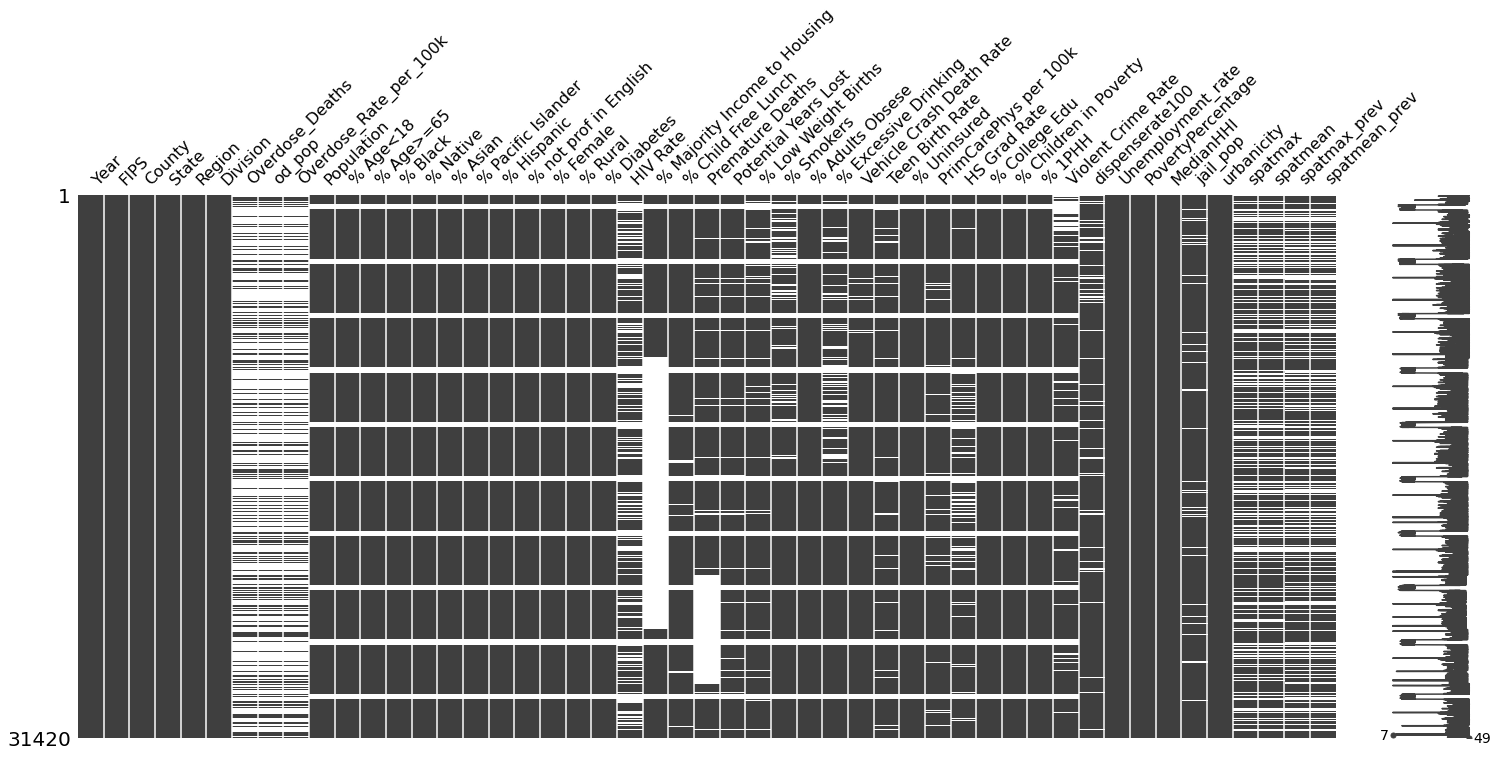

In [295]:
msno.matrix(od_full);

In [294]:
od_full.isna().sum()

Year                                0
FIPS                                0
County                              0
State                               0
Region                              0
Division                            0
Overdose_Deaths                 22209
od_pop                          22209
Overdose_Rate_per_100k          22209
Population                       2985
% Age<18                         2985
% Age>=65                        2985
% Black                          2985
% Native                         2985
% Asian                          2985
% Pacific Islander               2985
% Hispanic                       2985
% not prof in English            2987
% Female                         2985
% Rural                          2984
% Diabetes                       2985
HIV Rate                        10313
% Majority Income to Housing    17207
% Child Free Lunch               3701
Premature Deaths                10090
Potential Years Lost             4815
% Low Weight

## Imputing urbanicity

In [279]:
# Replacing the urbanicity for these NY counties with 4 - urban
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Bronx County, NY'), 'urbanicity'] = 4
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Kings County, NY'), 'urbanicity'] = 4
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Queens County, NY'), 'urbanicity'] = 4
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Richmond County, NY'), 'urbanicity'] = 4


# Replacing the urbanicity for other counties 
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Clifton Forge City County, VA'), 'urbanicity'] = 1
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Wrangell-Petersburg County, AK'), 'urbanicity'] = 1
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Yellowstone Nat Park County, MT'), 'urbanicity'] = 2
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Prince of Wales-Outer Ketchikan County, AK'), 'urbanicity'] = 1
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Skagway-Hoonah-Angoon County, AK'), 'urbanicity'] = 1
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Wrangell-Petersburg County, AK'), 'urbanicity'] = 1
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Bedford City County, VA'), 'urbanicity'] = 2

od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'South Boston City County, VA'), 'urbanicity'] = 1

od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Shannon County, SD'), 'urbanicity'] = 1
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Madison County, ID'), 'urbanicity'] = 1
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Madison County, IL'), 'urbanicity'] = 3
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Madison County, IN'), 'urbanicity'] = 3
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Madison County, IA'), 'urbanicity'] = 2
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Madison County, AL'), 'urbanicity'] = 2
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Madison County, MS'), 'urbanicity'] = 2
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Madison County, MO'), 'urbanicity'] = 1
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Madison County, MT'), 'urbanicity'] = 1
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Madison County, NE'), 'urbanicity'] = 1
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Madison County, NC'), 'urbanicity'] = 2
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Madison County, OH'), 'urbanicity'] = 3
od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['County'] == 'Madison County, VA'), 'urbanicity'] = 1

In [282]:
# create a list of all the missing counties' fips code
urban_countyna = list()

for i in od_full[od_full['urbanicity'].isnull()][['FIPS']].value_counts().index:
    urban_countyna.append(i[0])

In [283]:
incar = od_full[(od_full['Year'] > 2010) & (od_full['Year'] < 2019)]

In [287]:
# fill in missing urbanicity with the urbanicity of the most recent non-NA year
for fips in urban_countyna:
    if fips in incar['FIPS'].values:
        past_urban = incar.loc[(incar['FIPS'] == fips), 'urbanicity'].iloc[-1]
        od_full.loc[(od_full['urbanicity'].isnull()) & (od_full['FIPS'] == fips), 'urbanicity'] = past_urban

## Imputing jail_pop

In [292]:
jail_countyna = list()

for i in od_full[od_full['jail_pop'].isnull()][['FIPS']].value_counts().index:
    jail_countyna.append(i[0])

In [293]:
# fill in missing jail population with the urbanicity of the most recent non-NA year
for fips in jail_countyna:
    if fips in incar['FIPS'].values:
        past_jail = incar.loc[(incar['FIPS'] == fips), 'jail_pop'].iloc[-1]
        od_full.loc[(od_full['jail_pop'].isnull()) & (od_full['FIPS'] == fips), 'jail_pop'] = past_jail

In [296]:
# note that the years that having missing values are only 2019 and 2020
od_full[od_full['jail_pop'].isnull()][['Year']].value_counts()

Year
2011    183
2012    183
2013    183
2014    183
2015    183
2016    183
2017    183
2018    183
2019    166
2020    159
dtype: int64

# Rename Everything *Wonderfully*

In [297]:
od_full.columns

Index(['Year', 'FIPS', 'County', 'State', 'Region', 'Division',
       'Overdose_Deaths', 'od_pop', 'Overdose_Rate_per_100k', 'Population',
       '% Age<18', '% Age>=65', '% Black', '% Native', '% Asian',
       '% Pacific Islander', '% Hispanic', '% not prof in English', '% Female',
       '% Rural', '% Diabetes', 'HIV Rate', '% Majority Income to Housing',
       '% Child Free Lunch', 'Premature Deaths', 'Potential Years Lost',
       '% Low Weight Births', '% Smokers', '% Adults Obsese',
       '% Excessive Drinking', 'Vehicle Crash Death Rate', 'Teen Birth Rate',
       '% Uninsured', 'PrimCarePhys per 100k', 'HS Grad Rate', '% College Edu',
       '% Children in Poverty', '% 1PHH', 'Violent Crime Rate',
       'dispenserate100', 'Unemployment_rate', 'PovertyPercentage',
       'MedianHHI', 'jail_pop', 'urbanicity', 'spatmax', 'spatmean',
       'spatmax_prev', 'spatmean_prev'],
      dtype='object')

In [302]:
od_full.columns = ['Year', 'FIPS', 'County', 'State', 'Region', 'Division',
       'Overdose_Deaths', 'Overdose_Pop', 'Overdose_Rate_per_100k', 'Population',
       '%_Age<18', '%_Age>=65', '%_Black', '%_Native', '%_Asian',
       '%_Pacific_Islander', '%_Hispanic', '%_not_prof_in_Eng', '%_Female',
       '%_Rural', '%_Diabetes', 'HIV_Rate_per_100k', '%_Majority_Income_to_Housing',
       '%_Child_Free_Lunch', 'Premature_Deaths', 'Potential_Years_Lost',
       '%_Low_Weight_Births', '%_Smokers', '%_Adults_Obsese',
       '%_Excessive_Drinking', 'Vehicle_Crash_Death_Rate', 'Teen_Birth_Rate',
       '%_Uninsured', 'PrimCarePhys_per_100k', 'HS_Grad_Rate', '%_College_Edu',
       '%_Children_in_Poverty', '%_1Parent_HH', 'Violent_Crime_Rate',
       'Opioid_Disp_Rate_per_100', 'Unemployment_Rate', '%_Poverty',
       'Median_HHI', 'Jail_Pop', 'Urbanicity', 'Spatial_Mean', 'Spatial_Mean',
       'Prev_Spatial_Max', 'Prev_Spatial_Mean']

In [303]:
od_full

,Year,FIPS,County,State,Region,Division,Overdose_Deaths,Overdose_Pop,Overdose_Rate_per_100k,Population,%_Age<18,%_Age>=65,%_Black,%_Native,%_Asian,%_Pacific_Islander,%_Hispanic,%_not_prof_in_Eng,%_Female,%_Rural,%_Diabetes,HIV_Rate_per_100k,%_Majority_Income_to_Housing,%_Child_Free_Lunch,Premature_Deaths,Potential_Years_Lost,%_Low_Weight_Births,%_Smokers,%_Adults_Obsese,%_Excessive_Drinking,Vehicle_Crash_Death_Rate,Teen_Birth_Rate,%_Uninsured,PrimCarePhys_per_100k,HS_Grad_Rate,%_College_Edu,%_Children_in_Poverty,%_1Parent_HH,Violent_Crime_Rate,Opioid_Disp_Rate_per_100,Unemployment_Rate,%_Poverty,Median_HHI,Jail_Pop,Urbanicity,Spatial_Mean,Spatial_Mean,Prev_Spatial_Max,Prev_Spatial_Mean
0,2011,1001,"Autauga County, AL",Alabama,South,East South Central,NaN,NaN,NaN,50756.0,27.800000,11.600000,18.400000,0.500000,0.600000,0.000000,2.200000,0.800000,51.400000,44.800000,11.4,169.9,25.200000,28.800000,675.0,9967.400000,9.450000,27.400000,31.5,14.100000,28.300000,52.000000,15.500000,67.50000,75.000000,55.400000,14.9,29.700000,256.300000,144.1,8.3,14.9,48863.0,161.00,2.0,NaN,NaN,25.204500,16.526161
1,2011,1003,"Baldwin County, AL",Alabama,South,East South Central,24.0,186717.0,12.853677,179878.0,23.100000,17.000000,10.000000,0.500000,0.600000,0.000000,3.300000,1.800000,51.000000,54.200000,9.8,176.1,29.400000,28.900000,2219.0,8321.800000,8.820000,21.900000,26.2,19.400000,23.200000,49.600000,20.900000,120.90000,70.000000,61.500000,15.1,28.900000,194.700000,150.0,9.0,13.4,50144.0,743.36,2.0,42.000263,21.667119,26.096714,16.138937
2,2011,1005,"Barbour County, AL",Alabama,South,East South Central,NaN,NaN,NaN,29737.0,22.300000,13.800000,46.600000,0.500000,0.300000,0.000000,5.000000,2.300000,46.800000,71.500000,13.6,331.2,36.300000,65.100000,403.0,9559.000000,11.350000,22.900000,37.6,8.500000,29.200000,79.900000,16.300000,57.00000,55.000000,34.700000,31.9,52.500000,72.200000,99.4,11.4,29.5,30117.0,105.00,1.0,NaN,NaN,NaN,NaN
3,2011,1007,"Bibb County, AL",Alabama,South,East South Central,NaN,NaN,NaN,21587.0,23.300000,13.500000,22.300000,0.300000,0.100000,0.000000,1.500000,0.900000,48.000000,81.500000,11.1,89.5,17.600000,47.800000,365.0,13282.900000,9.940000,33.000000,32.3,11.300000,42.500000,64.400000,19.900000,41.70000,60.000000,40.300000,25.0,32.000000,164.400000,57.7,10.4,22.2,37347.0,67.50,3.0,13.640773,12.565340,25.204500,15.378684
4,2011,1009,"Blount County, AL",Alabama,South,East South Central,NaN,NaN,NaN,58345.0,24.200000,14.700000,2.100000,0.500000,0.200000,0.000000,7.900000,4.100000,50.200000,91.000000,11.4,66.2,21.200000,36.800000,756.0,8475.000000,7.320000,22.300000,31.9,4.900000,30.000000,55.500000,21.100000,36.30000,70.000000,42.300000,17.3,24.100000,45.800000,64.8,8.6,14.9,41940.0,127.50,3.0,55.504718,23.305981,50.728854,22.318995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31415,2020,56037,"Sweetwater County, WY",Wyoming,West,Mountain,15.0,42673.0,35.151032,43051.0,26.224710,12.111217,1.145153,1.544680,1.010429,0.157952,16.083250,1.633221,48.544749,10.916313,8.8,73.1,8.385595,39.333579,532.0,7831.827655,9.705248,18.073422,29.8,22.871908,33.962264,31.293325,14.464995,36.75288,80.500000,58.888094,10.0,25.320214,300.494146,70.0,7.4,7.6,70583.0,75.00,1.0,NaN,NaN,28.017626,28.017626
31416,2020,56039,"Teton County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,23081.0,18.365755,15.415277,0.632555,0.914172,1.412417,0.151640,14.878038,4.314477,48.403449,46.430920,2.2,65.4,10.769059,22.206991,109.0,2730.603992,7.736721,14.546369,12.4,25.533577,22.222222,10.462075,16.034517,116.05416,87.765957,81.397391,6.7,27.904870,NaN,50.6,6.0,5.2,92488.0,25.00,1.0,18.013002,18.013002,28.017626,20.953692
31417,2020,56041,"Uinta County, WY",Wyoming,West,Mountain,NaN,NaN,NaN,20299.0,28.789596,14.079511,0.684763,1.418789,0.472930,0.147791,9.236908,0.696080,49.332479,43.095937,11.3,30.8,7.707668,37.784558,256.0,

In [304]:
od_full.to_csv('od_full.csv', index = False)

# Dropping EDA 